In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import *
import cv2 
import os

In [2]:
image_arr = []
mask_arr = []

for root,dirs,files in os.walk("KMCDATAExtracted"):
    path = root.split(os.path.sep)[-1]
    if (path == "img"):
        images = os.listdir(root)
        for i,image_name in enumerate(images):
            if image_name.endswith(".png"):
                image_arr.append(root + "\\" + image_name)
                
                
    elif (path == "mask"):
        images = os.listdir(root)
        for i,image_name in enumerate(images):
            if image_name.endswith(".png"):
                mask_arr.append(root + "\\" + image_name)

In [3]:
print(len(image_arr))
print(len(mask_arr))

6600
6600


# Dataset

In [4]:
image_dataset = []
mask_dataset = []

for i in range(len(image_arr)):
    
    image = cv2.imread(image_arr[i],1)
    mask = cv2.imread(mask_arr[i],1)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    
    if (cv2.countNonZero(gray) == 0):
    
        print("****** Ignoring " + image_arr[i] + "******")
        
    else :
        
        label_img = image_arr[i].split("\\")
        label_mask = mask_arr[i].split("\\")
    
        path_img = "new_data" + "\\" + label_img[1] + "\\" + label_img[2] + "\\" + label_img[3]
        path_mask = "new_data" + "\\" + label_mask[1] + "\\" + label_mask[2] + "\\" + label_mask[3]
        
        #   cropping

        _,thresh = cv2.threshold(gray,1,255,cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        cnt = max(contours, key = cv2.contourArea, default = 0)
        
        if np.all(cnt) == 0:

            print("****** Ignoring " + image_arr[i] + "******")
            
        else:
            
            x,y,w,h = cv2.boundingRect(cnt)
            
            crop_img = image[y:y+h,x:x+w]
            crop_mask = mask[y:y+h,x:x+w]
            crop_mask[crop_mask>0]=255

            print(path_img)
            print(path_mask)
            
            crop_img=cv2.resize(crop_img, (256, 256),interpolation = cv2.INTER_LINEAR)
            crop_mask=cv2.resize(crop_mask, (256, 256),interpolation = cv2.INTER_LINEAR)

            cv2.imwrite(path_img, crop_img)
            cv2.imwrite(path_mask, crop_mask)

            crop_img = np.array(crop_img)
            crop_mask = np.array(crop_mask)

            image_dataset.append(crop_img)
            mask_dataset.append(crop_mask)

****** Ignoring KMCDATAExtracted\1\img\1_left_image_00000.png******
new_data\1\img\1_left_image_00001.png
new_data\1\mask\1_left_mask_00001.png
new_data\1\img\1_left_image_00002.png
new_data\1\mask\1_left_mask_00002.png
new_data\1\img\1_left_image_00003.png
new_data\1\mask\1_left_mask_00003.png
new_data\1\img\1_left_image_00004.png
new_data\1\mask\1_left_mask_00004.png
new_data\1\img\1_left_image_00005.png
new_data\1\mask\1_left_mask_00005.png
new_data\1\img\1_left_image_00006.png
new_data\1\mask\1_left_mask_00006.png
new_data\1\img\1_left_image_00007.png
new_data\1\mask\1_left_mask_00007.png
new_data\1\img\1_left_image_00008.png
new_data\1\mask\1_left_mask_00008.png
new_data\1\img\1_left_image_00009.png
new_data\1\mask\1_left_mask_00009.png
new_data\1\img\1_left_image_00010.png
new_data\1\mask\1_left_mask_00010.png
new_data\1\img\1_left_image_00011.png
new_data\1\mask\1_left_mask_00011.png
new_data\1\img\1_left_image_00012.png
new_data\1\mask\1_left_mask_00012.png
new_data\1\img\1_lef

new_data\1\img\1_left_image_00113.png
new_data\1\mask\1_left_mask_00113.png
new_data\1\img\1_left_image_00114.png
new_data\1\mask\1_left_mask_00114.png
new_data\1\img\1_left_image_00115.png
new_data\1\mask\1_left_mask_00115.png
new_data\1\img\1_left_image_00116.png
new_data\1\mask\1_left_mask_00116.png
new_data\1\img\1_left_image_00117.png
new_data\1\mask\1_left_mask_00117.png
new_data\1\img\1_left_image_00118.png
new_data\1\mask\1_left_mask_00118.png
new_data\1\img\1_left_image_00119.png
new_data\1\mask\1_left_mask_00119.png
new_data\1\img\1_left_image_00120.png
new_data\1\mask\1_left_mask_00120.png
new_data\1\img\1_left_image_00121.png
new_data\1\mask\1_left_mask_00121.png
new_data\1\img\1_left_image_00122.png
new_data\1\mask\1_left_mask_00122.png
new_data\1\img\1_left_image_00123.png
new_data\1\mask\1_left_mask_00123.png
new_data\1\img\1_left_image_00124.png
new_data\1\mask\1_left_mask_00124.png
new_data\1\img\1_left_image_00125.png
new_data\1\mask\1_left_mask_00125.png
new_data\1\i

new_data\1\img\1_left_image_00226.png
new_data\1\mask\1_left_mask_00226.png
new_data\1\img\1_left_image_00227.png
new_data\1\mask\1_left_mask_00227.png
new_data\1\img\1_left_image_00228.png
new_data\1\mask\1_left_mask_00228.png
new_data\1\img\1_left_image_00229.png
new_data\1\mask\1_left_mask_00229.png
new_data\1\img\1_left_image_00230.png
new_data\1\mask\1_left_mask_00230.png
new_data\1\img\1_left_image_00231.png
new_data\1\mask\1_left_mask_00231.png
new_data\1\img\1_left_image_00232.png
new_data\1\mask\1_left_mask_00232.png
new_data\1\img\1_left_image_00233.png
new_data\1\mask\1_left_mask_00233.png
new_data\1\img\1_left_image_00234.png
new_data\1\mask\1_left_mask_00234.png
new_data\1\img\1_left_image_00235.png
new_data\1\mask\1_left_mask_00235.png
new_data\1\img\1_left_image_00236.png
new_data\1\mask\1_left_mask_00236.png
new_data\1\img\1_left_image_00237.png
new_data\1\mask\1_left_mask_00237.png
new_data\1\img\1_left_image_00238.png
new_data\1\mask\1_left_mask_00238.png
new_data\1\i

new_data\1\img\1_left_image_00334.png
new_data\1\mask\1_left_mask_00334.png
new_data\1\img\1_left_image_00335.png
new_data\1\mask\1_left_mask_00335.png
new_data\1\img\1_left_image_00336.png
new_data\1\mask\1_left_mask_00336.png
new_data\1\img\1_left_image_00337.png
new_data\1\mask\1_left_mask_00337.png
new_data\1\img\1_left_image_00338.png
new_data\1\mask\1_left_mask_00338.png
new_data\1\img\1_left_image_00339.png
new_data\1\mask\1_left_mask_00339.png
new_data\1\img\1_left_image_00340.png
new_data\1\mask\1_left_mask_00340.png
new_data\1\img\1_left_image_00341.png
new_data\1\mask\1_left_mask_00341.png
new_data\1\img\1_left_image_00342.png
new_data\1\mask\1_left_mask_00342.png
new_data\1\img\1_left_image_00343.png
new_data\1\mask\1_left_mask_00343.png
new_data\1\img\1_left_image_00344.png
new_data\1\mask\1_left_mask_00344.png
new_data\1\img\1_left_image_00345.png
new_data\1\mask\1_left_mask_00345.png
new_data\1\img\1_left_image_00346.png
new_data\1\mask\1_left_mask_00346.png
new_data\1\i

new_data\1\img\1_left_image_00448.png
new_data\1\mask\1_left_mask_00448.png
new_data\1\img\1_left_image_00449.png
new_data\1\mask\1_left_mask_00449.png
new_data\1\img\1_left_image_00450.png
new_data\1\mask\1_left_mask_00450.png
new_data\1\img\1_left_image_00451.png
new_data\1\mask\1_left_mask_00451.png
new_data\1\img\1_left_image_00452.png
new_data\1\mask\1_left_mask_00452.png
new_data\1\img\1_left_image_00453.png
new_data\1\mask\1_left_mask_00453.png
new_data\1\img\1_left_image_00454.png
new_data\1\mask\1_left_mask_00454.png
new_data\1\img\1_left_image_00455.png
new_data\1\mask\1_left_mask_00455.png
new_data\1\img\1_left_image_00456.png
new_data\1\mask\1_left_mask_00456.png
new_data\1\img\1_left_image_00457.png
new_data\1\mask\1_left_mask_00457.png
new_data\1\img\1_left_image_00458.png
new_data\1\mask\1_left_mask_00458.png
new_data\1\img\1_left_image_00459.png
new_data\1\mask\1_left_mask_00459.png
new_data\1\img\1_left_image_00460.png
new_data\1\mask\1_left_mask_00460.png
new_data\1\i

new_data\1\img\1_left_image_00562.png
new_data\1\mask\1_left_mask_00562.png
new_data\1\img\1_left_image_00563.png
new_data\1\mask\1_left_mask_00563.png
new_data\1\img\1_left_image_00564.png
new_data\1\mask\1_left_mask_00564.png
new_data\1\img\1_left_image_00565.png
new_data\1\mask\1_left_mask_00565.png
new_data\1\img\1_left_image_00566.png
new_data\1\mask\1_left_mask_00566.png
new_data\1\img\1_left_image_00567.png
new_data\1\mask\1_left_mask_00567.png
new_data\1\img\1_left_image_00568.png
new_data\1\mask\1_left_mask_00568.png
new_data\1\img\1_left_image_00569.png
new_data\1\mask\1_left_mask_00569.png
new_data\1\img\1_left_image_00570.png
new_data\1\mask\1_left_mask_00570.png
new_data\1\img\1_left_image_00571.png
new_data\1\mask\1_left_mask_00571.png
new_data\1\img\1_left_image_00572.png
new_data\1\mask\1_left_mask_00572.png
new_data\1\img\1_left_image_00573.png
new_data\1\mask\1_left_mask_00573.png
new_data\1\img\1_left_image_00574.png
new_data\1\mask\1_left_mask_00574.png
new_data\1\i

****** Ignoring KMCDATAExtracted\1\img\1_right_image_00080.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00081.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00082.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00083.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00084.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00085.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00086.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00087.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00088.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00089.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00090.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00091.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00092.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00093.png******
****** Ignoring KMCDATAExtracted\1

****** Ignoring KMCDATAExtracted\1\img\1_right_image_00210.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00211.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00212.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00213.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00214.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00215.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00216.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00217.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00218.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00219.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00220.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00221.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00222.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00223.png******
****** Ignoring KMCDATAExtracted\1

****** Ignoring KMCDATAExtracted\1\img\1_right_image_00352.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00353.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00354.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00355.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00356.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00357.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00358.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00359.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00360.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00361.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00362.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00363.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00364.png******
****** Ignoring KMCDATAExtracted\1\img\1_right_image_00365.png******
****** Ignoring KMCDATAExtracted\1

new_data\1\img\1_right_image_00480.png
new_data\1\mask\1_right_mask_00480.png
new_data\1\img\1_right_image_00481.png
new_data\1\mask\1_right_mask_00481.png
new_data\1\img\1_right_image_00482.png
new_data\1\mask\1_right_mask_00482.png
new_data\1\img\1_right_image_00483.png
new_data\1\mask\1_right_mask_00483.png
new_data\1\img\1_right_image_00484.png
new_data\1\mask\1_right_mask_00484.png
new_data\1\img\1_right_image_00485.png
new_data\1\mask\1_right_mask_00485.png
new_data\1\img\1_right_image_00486.png
new_data\1\mask\1_right_mask_00486.png
new_data\1\img\1_right_image_00487.png
new_data\1\mask\1_right_mask_00487.png
new_data\1\img\1_right_image_00488.png
new_data\1\mask\1_right_mask_00488.png
new_data\1\img\1_right_image_00489.png
new_data\1\mask\1_right_mask_00489.png
new_data\1\img\1_right_image_00490.png
new_data\1\mask\1_right_mask_00490.png
new_data\1\img\1_right_image_00491.png
new_data\1\mask\1_right_mask_00491.png
new_data\1\img\1_right_image_00492.png
new_data\1\mask\1_right_m

****** Ignoring KMCDATAExtracted\2\img\2_left_image_00007.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00008.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00009.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00010.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00011.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00012.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00013.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00014.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00015.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00016.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00017.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00018.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00019.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00020.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_im

new_data\2\img\2_left_image_00124.png
new_data\2\mask\2_left_mask_00124.png
new_data\2\img\2_left_image_00125.png
new_data\2\mask\2_left_mask_00125.png
new_data\2\img\2_left_image_00126.png
new_data\2\mask\2_left_mask_00126.png
new_data\2\img\2_left_image_00127.png
new_data\2\mask\2_left_mask_00127.png
new_data\2\img\2_left_image_00128.png
new_data\2\mask\2_left_mask_00128.png
new_data\2\img\2_left_image_00129.png
new_data\2\mask\2_left_mask_00129.png
new_data\2\img\2_left_image_00130.png
new_data\2\mask\2_left_mask_00130.png
new_data\2\img\2_left_image_00131.png
new_data\2\mask\2_left_mask_00131.png
new_data\2\img\2_left_image_00132.png
new_data\2\mask\2_left_mask_00132.png
new_data\2\img\2_left_image_00133.png
new_data\2\mask\2_left_mask_00133.png
new_data\2\img\2_left_image_00134.png
new_data\2\mask\2_left_mask_00134.png
new_data\2\img\2_left_image_00135.png
new_data\2\mask\2_left_mask_00135.png
new_data\2\img\2_left_image_00136.png
new_data\2\mask\2_left_mask_00136.png
new_data\2\i

new_data\2\img\2_left_image_00235.png
new_data\2\mask\2_left_mask_00235.png
new_data\2\img\2_left_image_00236.png
new_data\2\mask\2_left_mask_00236.png
new_data\2\img\2_left_image_00237.png
new_data\2\mask\2_left_mask_00237.png
new_data\2\img\2_left_image_00238.png
new_data\2\mask\2_left_mask_00238.png
new_data\2\img\2_left_image_00239.png
new_data\2\mask\2_left_mask_00239.png
new_data\2\img\2_left_image_00240.png
new_data\2\mask\2_left_mask_00240.png
new_data\2\img\2_left_image_00241.png
new_data\2\mask\2_left_mask_00241.png
new_data\2\img\2_left_image_00242.png
new_data\2\mask\2_left_mask_00242.png
new_data\2\img\2_left_image_00243.png
new_data\2\mask\2_left_mask_00243.png
new_data\2\img\2_left_image_00244.png
new_data\2\mask\2_left_mask_00244.png
new_data\2\img\2_left_image_00245.png
new_data\2\mask\2_left_mask_00245.png
new_data\2\img\2_left_image_00246.png
new_data\2\mask\2_left_mask_00246.png
new_data\2\img\2_left_image_00247.png
new_data\2\mask\2_left_mask_00247.png
new_data\2\i

new_data\2\img\2_left_image_00345.png
new_data\2\mask\2_left_mask_00345.png
new_data\2\img\2_left_image_00346.png
new_data\2\mask\2_left_mask_00346.png
new_data\2\img\2_left_image_00347.png
new_data\2\mask\2_left_mask_00347.png
new_data\2\img\2_left_image_00348.png
new_data\2\mask\2_left_mask_00348.png
new_data\2\img\2_left_image_00349.png
new_data\2\mask\2_left_mask_00349.png
new_data\2\img\2_left_image_00350.png
new_data\2\mask\2_left_mask_00350.png
new_data\2\img\2_left_image_00351.png
new_data\2\mask\2_left_mask_00351.png
new_data\2\img\2_left_image_00352.png
new_data\2\mask\2_left_mask_00352.png
new_data\2\img\2_left_image_00353.png
new_data\2\mask\2_left_mask_00353.png
new_data\2\img\2_left_image_00354.png
new_data\2\mask\2_left_mask_00354.png
new_data\2\img\2_left_image_00355.png
new_data\2\mask\2_left_mask_00355.png
new_data\2\img\2_left_image_00356.png
new_data\2\mask\2_left_mask_00356.png
new_data\2\img\2_left_image_00357.png
new_data\2\mask\2_left_mask_00357.png
new_data\2\i

new_data\2\img\2_left_image_00454.png
new_data\2\mask\2_left_mask_00454.png
new_data\2\img\2_left_image_00455.png
new_data\2\mask\2_left_mask_00455.png
new_data\2\img\2_left_image_00456.png
new_data\2\mask\2_left_mask_00456.png
new_data\2\img\2_left_image_00457.png
new_data\2\mask\2_left_mask_00457.png
new_data\2\img\2_left_image_00458.png
new_data\2\mask\2_left_mask_00458.png
new_data\2\img\2_left_image_00459.png
new_data\2\mask\2_left_mask_00459.png
new_data\2\img\2_left_image_00460.png
new_data\2\mask\2_left_mask_00460.png
new_data\2\img\2_left_image_00461.png
new_data\2\mask\2_left_mask_00461.png
new_data\2\img\2_left_image_00462.png
new_data\2\mask\2_left_mask_00462.png
new_data\2\img\2_left_image_00463.png
new_data\2\mask\2_left_mask_00463.png
new_data\2\img\2_left_image_00464.png
new_data\2\mask\2_left_mask_00464.png
new_data\2\img\2_left_image_00465.png
new_data\2\mask\2_left_mask_00465.png
new_data\2\img\2_left_image_00466.png
new_data\2\mask\2_left_mask_00466.png
new_data\2\i

****** Ignoring KMCDATAExtracted\2\img\2_left_image_00569.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00570.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00571.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00572.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00573.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00574.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00575.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00576.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00577.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00578.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00579.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00580.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00581.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_image_00582.png******
****** Ignoring KMCDATAExtracted\2\img\2_left_im

new_data\2\img\2_right_image_00082.png
new_data\2\mask\2_right_mask_00082.png
new_data\2\img\2_right_image_00083.png
new_data\2\mask\2_right_mask_00083.png
new_data\2\img\2_right_image_00084.png
new_data\2\mask\2_right_mask_00084.png
new_data\2\img\2_right_image_00085.png
new_data\2\mask\2_right_mask_00085.png
new_data\2\img\2_right_image_00086.png
new_data\2\mask\2_right_mask_00086.png
new_data\2\img\2_right_image_00087.png
new_data\2\mask\2_right_mask_00087.png
new_data\2\img\2_right_image_00088.png
new_data\2\mask\2_right_mask_00088.png
new_data\2\img\2_right_image_00089.png
new_data\2\mask\2_right_mask_00089.png
new_data\2\img\2_right_image_00090.png
new_data\2\mask\2_right_mask_00090.png
new_data\2\img\2_right_image_00091.png
new_data\2\mask\2_right_mask_00091.png
new_data\2\img\2_right_image_00092.png
new_data\2\mask\2_right_mask_00092.png
new_data\2\img\2_right_image_00093.png
new_data\2\mask\2_right_mask_00093.png
new_data\2\img\2_right_image_00094.png
new_data\2\mask\2_right_m

new_data\2\img\2_right_image_00192.png
new_data\2\mask\2_right_mask_00192.png
new_data\2\img\2_right_image_00193.png
new_data\2\mask\2_right_mask_00193.png
new_data\2\img\2_right_image_00194.png
new_data\2\mask\2_right_mask_00194.png
new_data\2\img\2_right_image_00195.png
new_data\2\mask\2_right_mask_00195.png
new_data\2\img\2_right_image_00196.png
new_data\2\mask\2_right_mask_00196.png
new_data\2\img\2_right_image_00197.png
new_data\2\mask\2_right_mask_00197.png
new_data\2\img\2_right_image_00198.png
new_data\2\mask\2_right_mask_00198.png
new_data\2\img\2_right_image_00199.png
new_data\2\mask\2_right_mask_00199.png
new_data\2\img\2_right_image_00200.png
new_data\2\mask\2_right_mask_00200.png
new_data\2\img\2_right_image_00201.png
new_data\2\mask\2_right_mask_00201.png
new_data\2\img\2_right_image_00202.png
new_data\2\mask\2_right_mask_00202.png
new_data\2\img\2_right_image_00203.png
new_data\2\mask\2_right_mask_00203.png
new_data\2\img\2_right_image_00204.png
new_data\2\mask\2_right_m

new_data\2\img\2_right_image_00302.png
new_data\2\mask\2_right_mask_00302.png
new_data\2\img\2_right_image_00303.png
new_data\2\mask\2_right_mask_00303.png
new_data\2\img\2_right_image_00304.png
new_data\2\mask\2_right_mask_00304.png
new_data\2\img\2_right_image_00305.png
new_data\2\mask\2_right_mask_00305.png
new_data\2\img\2_right_image_00306.png
new_data\2\mask\2_right_mask_00306.png
new_data\2\img\2_right_image_00307.png
new_data\2\mask\2_right_mask_00307.png
new_data\2\img\2_right_image_00308.png
new_data\2\mask\2_right_mask_00308.png
new_data\2\img\2_right_image_00309.png
new_data\2\mask\2_right_mask_00309.png
new_data\2\img\2_right_image_00310.png
new_data\2\mask\2_right_mask_00310.png
new_data\2\img\2_right_image_00311.png
new_data\2\mask\2_right_mask_00311.png
new_data\2\img\2_right_image_00312.png
new_data\2\mask\2_right_mask_00312.png
new_data\2\img\2_right_image_00313.png
new_data\2\mask\2_right_mask_00313.png
new_data\2\img\2_right_image_00314.png
new_data\2\mask\2_right_m

new_data\2\img\2_right_image_00413.png
new_data\2\mask\2_right_mask_00413.png
new_data\2\img\2_right_image_00414.png
new_data\2\mask\2_right_mask_00414.png
new_data\2\img\2_right_image_00415.png
new_data\2\mask\2_right_mask_00415.png
new_data\2\img\2_right_image_00416.png
new_data\2\mask\2_right_mask_00416.png
new_data\2\img\2_right_image_00417.png
new_data\2\mask\2_right_mask_00417.png
new_data\2\img\2_right_image_00418.png
new_data\2\mask\2_right_mask_00418.png
new_data\2\img\2_right_image_00419.png
new_data\2\mask\2_right_mask_00419.png
new_data\2\img\2_right_image_00420.png
new_data\2\mask\2_right_mask_00420.png
new_data\2\img\2_right_image_00421.png
new_data\2\mask\2_right_mask_00421.png
new_data\2\img\2_right_image_00422.png
new_data\2\mask\2_right_mask_00422.png
new_data\2\img\2_right_image_00423.png
new_data\2\mask\2_right_mask_00423.png
new_data\2\img\2_right_image_00424.png
new_data\2\mask\2_right_mask_00424.png
new_data\2\img\2_right_image_00425.png
new_data\2\mask\2_right_m

new_data\2\img\2_right_image_00526.png
new_data\2\mask\2_right_mask_00526.png
new_data\2\img\2_right_image_00527.png
new_data\2\mask\2_right_mask_00527.png
new_data\2\img\2_right_image_00528.png
new_data\2\mask\2_right_mask_00528.png
new_data\2\img\2_right_image_00529.png
new_data\2\mask\2_right_mask_00529.png
new_data\2\img\2_right_image_00530.png
new_data\2\mask\2_right_mask_00530.png
new_data\2\img\2_right_image_00531.png
new_data\2\mask\2_right_mask_00531.png
new_data\2\img\2_right_image_00532.png
new_data\2\mask\2_right_mask_00532.png
new_data\2\img\2_right_image_00533.png
new_data\2\mask\2_right_mask_00533.png
new_data\2\img\2_right_image_00534.png
new_data\2\mask\2_right_mask_00534.png
new_data\2\img\2_right_image_00535.png
new_data\2\mask\2_right_mask_00535.png
new_data\2\img\2_right_image_00536.png
new_data\2\mask\2_right_mask_00536.png
new_data\2\img\2_right_image_00537.png
new_data\2\mask\2_right_mask_00537.png
new_data\2\img\2_right_image_00538.png
new_data\2\mask\2_right_m

new_data\3\img\3_left_image_00038.png
new_data\3\mask\3_left_mask_00038.png
new_data\3\img\3_left_image_00039.png
new_data\3\mask\3_left_mask_00039.png
new_data\3\img\3_left_image_00040.png
new_data\3\mask\3_left_mask_00040.png
new_data\3\img\3_left_image_00041.png
new_data\3\mask\3_left_mask_00041.png
new_data\3\img\3_left_image_00042.png
new_data\3\mask\3_left_mask_00042.png
new_data\3\img\3_left_image_00043.png
new_data\3\mask\3_left_mask_00043.png
new_data\3\img\3_left_image_00044.png
new_data\3\mask\3_left_mask_00044.png
new_data\3\img\3_left_image_00045.png
new_data\3\mask\3_left_mask_00045.png
new_data\3\img\3_left_image_00046.png
new_data\3\mask\3_left_mask_00046.png
new_data\3\img\3_left_image_00047.png
new_data\3\mask\3_left_mask_00047.png
new_data\3\img\3_left_image_00048.png
new_data\3\mask\3_left_mask_00048.png
new_data\3\img\3_left_image_00049.png
new_data\3\mask\3_left_mask_00049.png
new_data\3\img\3_left_image_00050.png
new_data\3\mask\3_left_mask_00050.png
new_data\3\i

new_data\3\img\3_left_image_00146.png
new_data\3\mask\3_left_mask_00146.png
new_data\3\img\3_left_image_00147.png
new_data\3\mask\3_left_mask_00147.png
new_data\3\img\3_left_image_00148.png
new_data\3\mask\3_left_mask_00148.png
new_data\3\img\3_left_image_00149.png
new_data\3\mask\3_left_mask_00149.png
new_data\3\img\3_left_image_00150.png
new_data\3\mask\3_left_mask_00150.png
new_data\3\img\3_left_image_00151.png
new_data\3\mask\3_left_mask_00151.png
new_data\3\img\3_left_image_00152.png
new_data\3\mask\3_left_mask_00152.png
new_data\3\img\3_left_image_00153.png
new_data\3\mask\3_left_mask_00153.png
new_data\3\img\3_left_image_00154.png
new_data\3\mask\3_left_mask_00154.png
new_data\3\img\3_left_image_00155.png
new_data\3\mask\3_left_mask_00155.png
new_data\3\img\3_left_image_00156.png
new_data\3\mask\3_left_mask_00156.png
new_data\3\img\3_left_image_00157.png
new_data\3\mask\3_left_mask_00157.png
new_data\3\img\3_left_image_00158.png
new_data\3\mask\3_left_mask_00158.png
new_data\3\i

new_data\3\img\3_left_image_00257.png
new_data\3\mask\3_left_mask_00257.png
new_data\3\img\3_left_image_00258.png
new_data\3\mask\3_left_mask_00258.png
new_data\3\img\3_left_image_00259.png
new_data\3\mask\3_left_mask_00259.png
new_data\3\img\3_left_image_00260.png
new_data\3\mask\3_left_mask_00260.png
new_data\3\img\3_left_image_00261.png
new_data\3\mask\3_left_mask_00261.png
new_data\3\img\3_left_image_00262.png
new_data\3\mask\3_left_mask_00262.png
new_data\3\img\3_left_image_00263.png
new_data\3\mask\3_left_mask_00263.png
new_data\3\img\3_left_image_00264.png
new_data\3\mask\3_left_mask_00264.png
new_data\3\img\3_left_image_00265.png
new_data\3\mask\3_left_mask_00265.png
new_data\3\img\3_left_image_00266.png
new_data\3\mask\3_left_mask_00266.png
new_data\3\img\3_left_image_00267.png
new_data\3\mask\3_left_mask_00267.png
new_data\3\img\3_left_image_00268.png
new_data\3\mask\3_left_mask_00268.png
new_data\3\img\3_left_image_00269.png
new_data\3\mask\3_left_mask_00269.png
new_data\3\i

new_data\3\img\3_left_image_00365.png
new_data\3\mask\3_left_mask_00365.png
new_data\3\img\3_left_image_00366.png
new_data\3\mask\3_left_mask_00366.png
new_data\3\img\3_left_image_00367.png
new_data\3\mask\3_left_mask_00367.png
new_data\3\img\3_left_image_00368.png
new_data\3\mask\3_left_mask_00368.png
new_data\3\img\3_left_image_00369.png
new_data\3\mask\3_left_mask_00369.png
new_data\3\img\3_left_image_00370.png
new_data\3\mask\3_left_mask_00370.png
new_data\3\img\3_left_image_00371.png
new_data\3\mask\3_left_mask_00371.png
new_data\3\img\3_left_image_00372.png
new_data\3\mask\3_left_mask_00372.png
new_data\3\img\3_left_image_00373.png
new_data\3\mask\3_left_mask_00373.png
new_data\3\img\3_left_image_00374.png
new_data\3\mask\3_left_mask_00374.png
new_data\3\img\3_left_image_00375.png
new_data\3\mask\3_left_mask_00375.png
new_data\3\img\3_left_image_00376.png
new_data\3\mask\3_left_mask_00376.png
new_data\3\img\3_left_image_00377.png
new_data\3\mask\3_left_mask_00377.png
new_data\3\i

new_data\3\img\3_left_image_00474.png
new_data\3\mask\3_left_mask_00474.png
new_data\3\img\3_left_image_00475.png
new_data\3\mask\3_left_mask_00475.png
new_data\3\img\3_left_image_00476.png
new_data\3\mask\3_left_mask_00476.png
new_data\3\img\3_left_image_00477.png
new_data\3\mask\3_left_mask_00477.png
new_data\3\img\3_left_image_00478.png
new_data\3\mask\3_left_mask_00478.png
new_data\3\img\3_left_image_00479.png
new_data\3\mask\3_left_mask_00479.png
new_data\3\img\3_left_image_00480.png
new_data\3\mask\3_left_mask_00480.png
new_data\3\img\3_left_image_00481.png
new_data\3\mask\3_left_mask_00481.png
new_data\3\img\3_left_image_00482.png
new_data\3\mask\3_left_mask_00482.png
new_data\3\img\3_left_image_00483.png
new_data\3\mask\3_left_mask_00483.png
new_data\3\img\3_left_image_00484.png
new_data\3\mask\3_left_mask_00484.png
new_data\3\img\3_left_image_00485.png
new_data\3\mask\3_left_mask_00485.png
new_data\3\img\3_left_image_00486.png
new_data\3\mask\3_left_mask_00486.png
new_data\3\i

new_data\3\img\3_left_image_00589.png
new_data\3\mask\3_left_mask_00589.png
new_data\3\img\3_left_image_00590.png
new_data\3\mask\3_left_mask_00590.png
new_data\3\img\3_left_image_00591.png
new_data\3\mask\3_left_mask_00591.png
new_data\3\img\3_left_image_00592.png
new_data\3\mask\3_left_mask_00592.png
new_data\3\img\3_left_image_00593.png
new_data\3\mask\3_left_mask_00593.png
new_data\3\img\3_left_image_00594.png
new_data\3\mask\3_left_mask_00594.png
new_data\3\img\3_left_image_00595.png
new_data\3\mask\3_left_mask_00595.png
new_data\3\img\3_left_image_00596.png
new_data\3\mask\3_left_mask_00596.png
new_data\3\img\3_left_image_00597.png
new_data\3\mask\3_left_mask_00597.png
new_data\3\img\3_left_image_00598.png
new_data\3\mask\3_left_mask_00598.png
new_data\3\img\3_left_image_00599.png
new_data\3\mask\3_left_mask_00599.png
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00000.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00001.png******
****** Ignoring KMCDATAExt

new_data\3\img\3_right_image_00106.png
new_data\3\mask\3_right_mask_00106.png
new_data\3\img\3_right_image_00107.png
new_data\3\mask\3_right_mask_00107.png
new_data\3\img\3_right_image_00108.png
new_data\3\mask\3_right_mask_00108.png
new_data\3\img\3_right_image_00109.png
new_data\3\mask\3_right_mask_00109.png
new_data\3\img\3_right_image_00110.png
new_data\3\mask\3_right_mask_00110.png
new_data\3\img\3_right_image_00111.png
new_data\3\mask\3_right_mask_00111.png
new_data\3\img\3_right_image_00112.png
new_data\3\mask\3_right_mask_00112.png
new_data\3\img\3_right_image_00113.png
new_data\3\mask\3_right_mask_00113.png
new_data\3\img\3_right_image_00114.png
new_data\3\mask\3_right_mask_00114.png
new_data\3\img\3_right_image_00115.png
new_data\3\mask\3_right_mask_00115.png
new_data\3\img\3_right_image_00116.png
new_data\3\mask\3_right_mask_00116.png
new_data\3\img\3_right_image_00117.png
new_data\3\mask\3_right_mask_00117.png
new_data\3\img\3_right_image_00118.png
new_data\3\mask\3_right_m

new_data\3\img\3_right_image_00214.png
new_data\3\mask\3_right_mask_00214.png
new_data\3\img\3_right_image_00215.png
new_data\3\mask\3_right_mask_00215.png
new_data\3\img\3_right_image_00216.png
new_data\3\mask\3_right_mask_00216.png
new_data\3\img\3_right_image_00217.png
new_data\3\mask\3_right_mask_00217.png
new_data\3\img\3_right_image_00218.png
new_data\3\mask\3_right_mask_00218.png
new_data\3\img\3_right_image_00219.png
new_data\3\mask\3_right_mask_00219.png
new_data\3\img\3_right_image_00220.png
new_data\3\mask\3_right_mask_00220.png
new_data\3\img\3_right_image_00221.png
new_data\3\mask\3_right_mask_00221.png
new_data\3\img\3_right_image_00222.png
new_data\3\mask\3_right_mask_00222.png
new_data\3\img\3_right_image_00223.png
new_data\3\mask\3_right_mask_00223.png
new_data\3\img\3_right_image_00224.png
new_data\3\mask\3_right_mask_00224.png
new_data\3\img\3_right_image_00225.png
new_data\3\mask\3_right_mask_00225.png
new_data\3\img\3_right_image_00226.png
new_data\3\mask\3_right_m

new_data\3\img\3_right_image_00322.png
new_data\3\mask\3_right_mask_00322.png
new_data\3\img\3_right_image_00323.png
new_data\3\mask\3_right_mask_00323.png
new_data\3\img\3_right_image_00324.png
new_data\3\mask\3_right_mask_00324.png
new_data\3\img\3_right_image_00325.png
new_data\3\mask\3_right_mask_00325.png
new_data\3\img\3_right_image_00326.png
new_data\3\mask\3_right_mask_00326.png
new_data\3\img\3_right_image_00327.png
new_data\3\mask\3_right_mask_00327.png
new_data\3\img\3_right_image_00328.png
new_data\3\mask\3_right_mask_00328.png
new_data\3\img\3_right_image_00329.png
new_data\3\mask\3_right_mask_00329.png
new_data\3\img\3_right_image_00330.png
new_data\3\mask\3_right_mask_00330.png
new_data\3\img\3_right_image_00331.png
new_data\3\mask\3_right_mask_00331.png
new_data\3\img\3_right_image_00332.png
new_data\3\mask\3_right_mask_00332.png
new_data\3\img\3_right_image_00333.png
new_data\3\mask\3_right_mask_00333.png
new_data\3\img\3_right_image_00334.png
new_data\3\mask\3_right_m

new_data\3\img\3_right_image_00430.png
new_data\3\mask\3_right_mask_00430.png
new_data\3\img\3_right_image_00431.png
new_data\3\mask\3_right_mask_00431.png
new_data\3\img\3_right_image_00432.png
new_data\3\mask\3_right_mask_00432.png
new_data\3\img\3_right_image_00433.png
new_data\3\mask\3_right_mask_00433.png
new_data\3\img\3_right_image_00434.png
new_data\3\mask\3_right_mask_00434.png
new_data\3\img\3_right_image_00435.png
new_data\3\mask\3_right_mask_00435.png
new_data\3\img\3_right_image_00436.png
new_data\3\mask\3_right_mask_00436.png
new_data\3\img\3_right_image_00437.png
new_data\3\mask\3_right_mask_00437.png
new_data\3\img\3_right_image_00438.png
new_data\3\mask\3_right_mask_00438.png
new_data\3\img\3_right_image_00439.png
new_data\3\mask\3_right_mask_00439.png
new_data\3\img\3_right_image_00440.png
new_data\3\mask\3_right_mask_00440.png
new_data\3\img\3_right_image_00441.png
new_data\3\mask\3_right_mask_00441.png
new_data\3\img\3_right_image_00442.png
new_data\3\mask\3_right_m

new_data\3\img\3_right_image_00537.png
new_data\3\mask\3_right_mask_00537.png
new_data\3\img\3_right_image_00538.png
new_data\3\mask\3_right_mask_00538.png
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00539.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00540.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00541.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00542.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00543.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00544.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00545.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00546.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00547.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00548.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00549.png******
****** Ignoring KMCDATAExtracted\3\img\3_right_image_00550.png******
****** Ignoring 

new_data\4\img\4_left_image_00056.png
new_data\4\mask\4_left_mask_00056.png
new_data\4\img\4_left_image_00057.png
new_data\4\mask\4_left_mask_00057.png
new_data\4\img\4_left_image_00058.png
new_data\4\mask\4_left_mask_00058.png
new_data\4\img\4_left_image_00059.png
new_data\4\mask\4_left_mask_00059.png
new_data\4\img\4_left_image_00060.png
new_data\4\mask\4_left_mask_00060.png
new_data\4\img\4_left_image_00061.png
new_data\4\mask\4_left_mask_00061.png
new_data\4\img\4_left_image_00062.png
new_data\4\mask\4_left_mask_00062.png
new_data\4\img\4_left_image_00063.png
new_data\4\mask\4_left_mask_00063.png
new_data\4\img\4_left_image_00064.png
new_data\4\mask\4_left_mask_00064.png
new_data\4\img\4_left_image_00065.png
new_data\4\mask\4_left_mask_00065.png
new_data\4\img\4_left_image_00066.png
new_data\4\mask\4_left_mask_00066.png
new_data\4\img\4_left_image_00067.png
new_data\4\mask\4_left_mask_00067.png
new_data\4\img\4_left_image_00068.png
new_data\4\mask\4_left_mask_00068.png
new_data\4\i

new_data\4\img\4_left_image_00165.png
new_data\4\mask\4_left_mask_00165.png
new_data\4\img\4_left_image_00166.png
new_data\4\mask\4_left_mask_00166.png
new_data\4\img\4_left_image_00167.png
new_data\4\mask\4_left_mask_00167.png
new_data\4\img\4_left_image_00168.png
new_data\4\mask\4_left_mask_00168.png
new_data\4\img\4_left_image_00169.png
new_data\4\mask\4_left_mask_00169.png
new_data\4\img\4_left_image_00170.png
new_data\4\mask\4_left_mask_00170.png
new_data\4\img\4_left_image_00171.png
new_data\4\mask\4_left_mask_00171.png
new_data\4\img\4_left_image_00172.png
new_data\4\mask\4_left_mask_00172.png
new_data\4\img\4_left_image_00173.png
new_data\4\mask\4_left_mask_00173.png
new_data\4\img\4_left_image_00174.png
new_data\4\mask\4_left_mask_00174.png
new_data\4\img\4_left_image_00175.png
new_data\4\mask\4_left_mask_00175.png
new_data\4\img\4_left_image_00176.png
new_data\4\mask\4_left_mask_00176.png
new_data\4\img\4_left_image_00177.png
new_data\4\mask\4_left_mask_00177.png
new_data\4\i

new_data\4\img\4_left_image_00274.png
new_data\4\mask\4_left_mask_00274.png
new_data\4\img\4_left_image_00275.png
new_data\4\mask\4_left_mask_00275.png
new_data\4\img\4_left_image_00276.png
new_data\4\mask\4_left_mask_00276.png
new_data\4\img\4_left_image_00277.png
new_data\4\mask\4_left_mask_00277.png
new_data\4\img\4_left_image_00278.png
new_data\4\mask\4_left_mask_00278.png
new_data\4\img\4_left_image_00279.png
new_data\4\mask\4_left_mask_00279.png
new_data\4\img\4_left_image_00280.png
new_data\4\mask\4_left_mask_00280.png
new_data\4\img\4_left_image_00281.png
new_data\4\mask\4_left_mask_00281.png
new_data\4\img\4_left_image_00282.png
new_data\4\mask\4_left_mask_00282.png
new_data\4\img\4_left_image_00283.png
new_data\4\mask\4_left_mask_00283.png
new_data\4\img\4_left_image_00284.png
new_data\4\mask\4_left_mask_00284.png
new_data\4\img\4_left_image_00285.png
new_data\4\mask\4_left_mask_00285.png
new_data\4\img\4_left_image_00286.png
new_data\4\mask\4_left_mask_00286.png
new_data\4\i

new_data\4\img\4_left_image_00382.png
new_data\4\mask\4_left_mask_00382.png
new_data\4\img\4_left_image_00383.png
new_data\4\mask\4_left_mask_00383.png
new_data\4\img\4_left_image_00384.png
new_data\4\mask\4_left_mask_00384.png
new_data\4\img\4_left_image_00385.png
new_data\4\mask\4_left_mask_00385.png
new_data\4\img\4_left_image_00386.png
new_data\4\mask\4_left_mask_00386.png
new_data\4\img\4_left_image_00387.png
new_data\4\mask\4_left_mask_00387.png
new_data\4\img\4_left_image_00388.png
new_data\4\mask\4_left_mask_00388.png
new_data\4\img\4_left_image_00389.png
new_data\4\mask\4_left_mask_00389.png
new_data\4\img\4_left_image_00390.png
new_data\4\mask\4_left_mask_00390.png
new_data\4\img\4_left_image_00391.png
new_data\4\mask\4_left_mask_00391.png
new_data\4\img\4_left_image_00392.png
new_data\4\mask\4_left_mask_00392.png
new_data\4\img\4_left_image_00393.png
new_data\4\mask\4_left_mask_00393.png
new_data\4\img\4_left_image_00394.png
new_data\4\mask\4_left_mask_00394.png
new_data\4\i

new_data\4\img\4_left_image_00490.png
new_data\4\mask\4_left_mask_00490.png
new_data\4\img\4_left_image_00491.png
new_data\4\mask\4_left_mask_00491.png
new_data\4\img\4_left_image_00492.png
new_data\4\mask\4_left_mask_00492.png
new_data\4\img\4_left_image_00493.png
new_data\4\mask\4_left_mask_00493.png
new_data\4\img\4_left_image_00494.png
new_data\4\mask\4_left_mask_00494.png
new_data\4\img\4_left_image_00495.png
new_data\4\mask\4_left_mask_00495.png
new_data\4\img\4_left_image_00496.png
new_data\4\mask\4_left_mask_00496.png
new_data\4\img\4_left_image_00497.png
new_data\4\mask\4_left_mask_00497.png
new_data\4\img\4_left_image_00498.png
new_data\4\mask\4_left_mask_00498.png
new_data\4\img\4_left_image_00499.png
new_data\4\mask\4_left_mask_00499.png
new_data\4\img\4_left_image_00500.png
new_data\4\mask\4_left_mask_00500.png
new_data\4\img\4_left_image_00501.png
new_data\4\mask\4_left_mask_00501.png
new_data\4\img\4_left_image_00502.png
new_data\4\mask\4_left_mask_00502.png
new_data\4\i

****** Ignoring KMCDATAExtracted\4\img\4_right_image_00004.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00005.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00006.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00007.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00008.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00009.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00010.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00011.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00012.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00013.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00014.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00015.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00016.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00017.png******
****** Ignoring KMCDATAExtracted\4

new_data\4\img\4_right_image_00121.png
new_data\4\mask\4_right_mask_00121.png
new_data\4\img\4_right_image_00122.png
new_data\4\mask\4_right_mask_00122.png
new_data\4\img\4_right_image_00123.png
new_data\4\mask\4_right_mask_00123.png
new_data\4\img\4_right_image_00124.png
new_data\4\mask\4_right_mask_00124.png
new_data\4\img\4_right_image_00125.png
new_data\4\mask\4_right_mask_00125.png
new_data\4\img\4_right_image_00126.png
new_data\4\mask\4_right_mask_00126.png
new_data\4\img\4_right_image_00127.png
new_data\4\mask\4_right_mask_00127.png
new_data\4\img\4_right_image_00128.png
new_data\4\mask\4_right_mask_00128.png
new_data\4\img\4_right_image_00129.png
new_data\4\mask\4_right_mask_00129.png
new_data\4\img\4_right_image_00130.png
new_data\4\mask\4_right_mask_00130.png
new_data\4\img\4_right_image_00131.png
new_data\4\mask\4_right_mask_00131.png
new_data\4\img\4_right_image_00132.png
new_data\4\mask\4_right_mask_00132.png
new_data\4\img\4_right_image_00133.png
new_data\4\mask\4_right_m

new_data\4\img\4_right_image_00229.png
new_data\4\mask\4_right_mask_00229.png
new_data\4\img\4_right_image_00230.png
new_data\4\mask\4_right_mask_00230.png
new_data\4\img\4_right_image_00231.png
new_data\4\mask\4_right_mask_00231.png
new_data\4\img\4_right_image_00232.png
new_data\4\mask\4_right_mask_00232.png
new_data\4\img\4_right_image_00233.png
new_data\4\mask\4_right_mask_00233.png
new_data\4\img\4_right_image_00234.png
new_data\4\mask\4_right_mask_00234.png
new_data\4\img\4_right_image_00235.png
new_data\4\mask\4_right_mask_00235.png
new_data\4\img\4_right_image_00236.png
new_data\4\mask\4_right_mask_00236.png
new_data\4\img\4_right_image_00237.png
new_data\4\mask\4_right_mask_00237.png
new_data\4\img\4_right_image_00238.png
new_data\4\mask\4_right_mask_00238.png
new_data\4\img\4_right_image_00239.png
new_data\4\mask\4_right_mask_00239.png
new_data\4\img\4_right_image_00240.png
new_data\4\mask\4_right_mask_00240.png
new_data\4\img\4_right_image_00241.png
new_data\4\mask\4_right_m

new_data\4\img\4_right_image_00337.png
new_data\4\mask\4_right_mask_00337.png
new_data\4\img\4_right_image_00338.png
new_data\4\mask\4_right_mask_00338.png
new_data\4\img\4_right_image_00339.png
new_data\4\mask\4_right_mask_00339.png
new_data\4\img\4_right_image_00340.png
new_data\4\mask\4_right_mask_00340.png
new_data\4\img\4_right_image_00341.png
new_data\4\mask\4_right_mask_00341.png
new_data\4\img\4_right_image_00342.png
new_data\4\mask\4_right_mask_00342.png
new_data\4\img\4_right_image_00343.png
new_data\4\mask\4_right_mask_00343.png
new_data\4\img\4_right_image_00344.png
new_data\4\mask\4_right_mask_00344.png
new_data\4\img\4_right_image_00345.png
new_data\4\mask\4_right_mask_00345.png
new_data\4\img\4_right_image_00346.png
new_data\4\mask\4_right_mask_00346.png
new_data\4\img\4_right_image_00347.png
new_data\4\mask\4_right_mask_00347.png
new_data\4\img\4_right_image_00348.png
new_data\4\mask\4_right_mask_00348.png
new_data\4\img\4_right_image_00349.png
new_data\4\mask\4_right_m

new_data\4\img\4_right_image_00449.png
new_data\4\mask\4_right_mask_00449.png
new_data\4\img\4_right_image_00450.png
new_data\4\mask\4_right_mask_00450.png
new_data\4\img\4_right_image_00451.png
new_data\4\mask\4_right_mask_00451.png
new_data\4\img\4_right_image_00452.png
new_data\4\mask\4_right_mask_00452.png
new_data\4\img\4_right_image_00453.png
new_data\4\mask\4_right_mask_00453.png
new_data\4\img\4_right_image_00454.png
new_data\4\mask\4_right_mask_00454.png
new_data\4\img\4_right_image_00455.png
new_data\4\mask\4_right_mask_00455.png
new_data\4\img\4_right_image_00456.png
new_data\4\mask\4_right_mask_00456.png
new_data\4\img\4_right_image_00457.png
new_data\4\mask\4_right_mask_00457.png
new_data\4\img\4_right_image_00458.png
new_data\4\mask\4_right_mask_00458.png
new_data\4\img\4_right_image_00459.png
new_data\4\mask\4_right_mask_00459.png
new_data\4\img\4_right_image_00460.png
new_data\4\mask\4_right_mask_00460.png
new_data\4\img\4_right_image_00461.png
new_data\4\mask\4_right_m

****** Ignoring KMCDATAExtracted\4\img\4_right_image_00559.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00560.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00561.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00562.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00563.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00564.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00565.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00566.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00567.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00568.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00569.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00570.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00571.png******
****** Ignoring KMCDATAExtracted\4\img\4_right_image_00572.png******
****** Ignoring KMCDATAExtracted\4

new_data\5\img\5_left_image_00075.png
new_data\5\mask\5_left_mask_00075.png
new_data\5\img\5_left_image_00076.png
new_data\5\mask\5_left_mask_00076.png
new_data\5\img\5_left_image_00077.png
new_data\5\mask\5_left_mask_00077.png
new_data\5\img\5_left_image_00078.png
new_data\5\mask\5_left_mask_00078.png
new_data\5\img\5_left_image_00079.png
new_data\5\mask\5_left_mask_00079.png
new_data\5\img\5_left_image_00080.png
new_data\5\mask\5_left_mask_00080.png
new_data\5\img\5_left_image_00081.png
new_data\5\mask\5_left_mask_00081.png
new_data\5\img\5_left_image_00082.png
new_data\5\mask\5_left_mask_00082.png
new_data\5\img\5_left_image_00083.png
new_data\5\mask\5_left_mask_00083.png
new_data\5\img\5_left_image_00084.png
new_data\5\mask\5_left_mask_00084.png
new_data\5\img\5_left_image_00085.png
new_data\5\mask\5_left_mask_00085.png
new_data\5\img\5_left_image_00086.png
new_data\5\mask\5_left_mask_00086.png
new_data\5\img\5_left_image_00087.png
new_data\5\mask\5_left_mask_00087.png
new_data\5\i

new_data\5\img\5_left_image_00183.png
new_data\5\mask\5_left_mask_00183.png
new_data\5\img\5_left_image_00184.png
new_data\5\mask\5_left_mask_00184.png
new_data\5\img\5_left_image_00185.png
new_data\5\mask\5_left_mask_00185.png
new_data\5\img\5_left_image_00186.png
new_data\5\mask\5_left_mask_00186.png
new_data\5\img\5_left_image_00187.png
new_data\5\mask\5_left_mask_00187.png
new_data\5\img\5_left_image_00188.png
new_data\5\mask\5_left_mask_00188.png
new_data\5\img\5_left_image_00189.png
new_data\5\mask\5_left_mask_00189.png
new_data\5\img\5_left_image_00190.png
new_data\5\mask\5_left_mask_00190.png
new_data\5\img\5_left_image_00191.png
new_data\5\mask\5_left_mask_00191.png
new_data\5\img\5_left_image_00192.png
new_data\5\mask\5_left_mask_00192.png
new_data\5\img\5_left_image_00193.png
new_data\5\mask\5_left_mask_00193.png
new_data\5\img\5_left_image_00194.png
new_data\5\mask\5_left_mask_00194.png
new_data\5\img\5_left_image_00195.png
new_data\5\mask\5_left_mask_00195.png
new_data\5\i

new_data\5\img\5_left_image_00292.png
new_data\5\mask\5_left_mask_00292.png
new_data\5\img\5_left_image_00293.png
new_data\5\mask\5_left_mask_00293.png
new_data\5\img\5_left_image_00294.png
new_data\5\mask\5_left_mask_00294.png
new_data\5\img\5_left_image_00295.png
new_data\5\mask\5_left_mask_00295.png
new_data\5\img\5_left_image_00296.png
new_data\5\mask\5_left_mask_00296.png
new_data\5\img\5_left_image_00297.png
new_data\5\mask\5_left_mask_00297.png
new_data\5\img\5_left_image_00298.png
new_data\5\mask\5_left_mask_00298.png
new_data\5\img\5_left_image_00299.png
new_data\5\mask\5_left_mask_00299.png
new_data\5\img\5_left_image_00300.png
new_data\5\mask\5_left_mask_00300.png
new_data\5\img\5_left_image_00301.png
new_data\5\mask\5_left_mask_00301.png
new_data\5\img\5_left_image_00302.png
new_data\5\mask\5_left_mask_00302.png
new_data\5\img\5_left_image_00303.png
new_data\5\mask\5_left_mask_00303.png
new_data\5\img\5_left_image_00304.png
new_data\5\mask\5_left_mask_00304.png
new_data\5\i

new_data\5\img\5_left_image_00403.png
new_data\5\mask\5_left_mask_00403.png
new_data\5\img\5_left_image_00404.png
new_data\5\mask\5_left_mask_00404.png
new_data\5\img\5_left_image_00405.png
new_data\5\mask\5_left_mask_00405.png
new_data\5\img\5_left_image_00406.png
new_data\5\mask\5_left_mask_00406.png
new_data\5\img\5_left_image_00407.png
new_data\5\mask\5_left_mask_00407.png
new_data\5\img\5_left_image_00408.png
new_data\5\mask\5_left_mask_00408.png
new_data\5\img\5_left_image_00409.png
new_data\5\mask\5_left_mask_00409.png
new_data\5\img\5_left_image_00410.png
new_data\5\mask\5_left_mask_00410.png
new_data\5\img\5_left_image_00411.png
new_data\5\mask\5_left_mask_00411.png
new_data\5\img\5_left_image_00412.png
new_data\5\mask\5_left_mask_00412.png
new_data\5\img\5_left_image_00413.png
new_data\5\mask\5_left_mask_00413.png
new_data\5\img\5_left_image_00414.png
new_data\5\mask\5_left_mask_00414.png
new_data\5\img\5_left_image_00415.png
new_data\5\mask\5_left_mask_00415.png
new_data\5\i

new_data\5\img\5_left_image_00515.png
new_data\5\mask\5_left_mask_00515.png
new_data\5\img\5_left_image_00516.png
new_data\5\mask\5_left_mask_00516.png
new_data\5\img\5_left_image_00517.png
new_data\5\mask\5_left_mask_00517.png
new_data\5\img\5_left_image_00518.png
new_data\5\mask\5_left_mask_00518.png
new_data\5\img\5_left_image_00519.png
new_data\5\mask\5_left_mask_00519.png
new_data\5\img\5_left_image_00520.png
new_data\5\mask\5_left_mask_00520.png
new_data\5\img\5_left_image_00521.png
new_data\5\mask\5_left_mask_00521.png
new_data\5\img\5_left_image_00522.png
new_data\5\mask\5_left_mask_00522.png
new_data\5\img\5_left_image_00523.png
new_data\5\mask\5_left_mask_00523.png
new_data\5\img\5_left_image_00524.png
new_data\5\mask\5_left_mask_00524.png
new_data\5\img\5_left_image_00525.png
new_data\5\mask\5_left_mask_00525.png
new_data\5\img\5_left_image_00526.png
new_data\5\mask\5_left_mask_00526.png
new_data\5\img\5_left_image_00527.png
new_data\5\mask\5_left_mask_00527.png
new_data\5\i

****** Ignoring KMCDATAExtracted\5\img\5_right_image_00032.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00033.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00034.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00035.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00036.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00037.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00038.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00039.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00040.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00041.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00042.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00043.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00044.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00045.png******
****** Ignoring KMCDATAExtracted\5

****** Ignoring KMCDATAExtracted\5\img\5_right_image_00157.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00158.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00159.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00160.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00161.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00162.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00163.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00164.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00165.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00166.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00167.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00168.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00169.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00170.png******
****** Ignoring KMCDATAExtracted\5

****** Ignoring KMCDATAExtracted\5\img\5_right_image_00281.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00282.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00283.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00284.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00285.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00286.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00287.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00288.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00289.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00290.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00291.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00292.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00293.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00294.png******
****** Ignoring KMCDATAExtracted\5

****** Ignoring KMCDATAExtracted\5\img\5_right_image_00405.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00406.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00407.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00408.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00409.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00410.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00411.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00412.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00413.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00414.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00415.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00416.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00417.png******
****** Ignoring KMCDATAExtracted\5\img\5_right_image_00418.png******
****** Ignoring KMCDATAExtracted\5

new_data\5\img\5_right_image_00514.png
new_data\5\mask\5_right_mask_00514.png
new_data\5\img\5_right_image_00515.png
new_data\5\mask\5_right_mask_00515.png
new_data\5\img\5_right_image_00516.png
new_data\5\mask\5_right_mask_00516.png
new_data\5\img\5_right_image_00517.png
new_data\5\mask\5_right_mask_00517.png
new_data\5\img\5_right_image_00518.png
new_data\5\mask\5_right_mask_00518.png
new_data\5\img\5_right_image_00519.png
new_data\5\mask\5_right_mask_00519.png
new_data\5\img\5_right_image_00520.png
new_data\5\mask\5_right_mask_00520.png
new_data\5\img\5_right_image_00521.png
new_data\5\mask\5_right_mask_00521.png
new_data\5\img\5_right_image_00522.png
new_data\5\mask\5_right_mask_00522.png
new_data\5\img\5_right_image_00523.png
new_data\5\mask\5_right_mask_00523.png
new_data\5\img\5_right_image_00524.png
new_data\5\mask\5_right_mask_00524.png
new_data\5\img\5_right_image_00525.png
new_data\5\mask\5_right_mask_00525.png
new_data\5\img\5_right_image_00526.png
new_data\5\mask\5_right_m

new_data\6\img\6_left_image_00031.png
new_data\6\mask\6_left_mask_00031.png
new_data\6\img\6_left_image_00032.png
new_data\6\mask\6_left_mask_00032.png
new_data\6\img\6_left_image_00033.png
new_data\6\mask\6_left_mask_00033.png
new_data\6\img\6_left_image_00034.png
new_data\6\mask\6_left_mask_00034.png
new_data\6\img\6_left_image_00035.png
new_data\6\mask\6_left_mask_00035.png
new_data\6\img\6_left_image_00036.png
new_data\6\mask\6_left_mask_00036.png
new_data\6\img\6_left_image_00037.png
new_data\6\mask\6_left_mask_00037.png
new_data\6\img\6_left_image_00038.png
new_data\6\mask\6_left_mask_00038.png
new_data\6\img\6_left_image_00039.png
new_data\6\mask\6_left_mask_00039.png
new_data\6\img\6_left_image_00040.png
new_data\6\mask\6_left_mask_00040.png
new_data\6\img\6_left_image_00041.png
new_data\6\mask\6_left_mask_00041.png
new_data\6\img\6_left_image_00042.png
new_data\6\mask\6_left_mask_00042.png
new_data\6\img\6_left_image_00043.png
new_data\6\mask\6_left_mask_00043.png
new_data\6\i

new_data\6\img\6_left_image_00141.png
new_data\6\mask\6_left_mask_00141.png
new_data\6\img\6_left_image_00142.png
new_data\6\mask\6_left_mask_00142.png
new_data\6\img\6_left_image_00143.png
new_data\6\mask\6_left_mask_00143.png
new_data\6\img\6_left_image_00144.png
new_data\6\mask\6_left_mask_00144.png
new_data\6\img\6_left_image_00145.png
new_data\6\mask\6_left_mask_00145.png
new_data\6\img\6_left_image_00146.png
new_data\6\mask\6_left_mask_00146.png
new_data\6\img\6_left_image_00147.png
new_data\6\mask\6_left_mask_00147.png
new_data\6\img\6_left_image_00148.png
new_data\6\mask\6_left_mask_00148.png
new_data\6\img\6_left_image_00149.png
new_data\6\mask\6_left_mask_00149.png
new_data\6\img\6_left_image_00150.png
new_data\6\mask\6_left_mask_00150.png
new_data\6\img\6_left_image_00151.png
new_data\6\mask\6_left_mask_00151.png
new_data\6\img\6_left_image_00152.png
new_data\6\mask\6_left_mask_00152.png
new_data\6\img\6_left_image_00153.png
new_data\6\mask\6_left_mask_00153.png
new_data\6\i

new_data\6\img\6_left_image_00249.png
new_data\6\mask\6_left_mask_00249.png
new_data\6\img\6_left_image_00250.png
new_data\6\mask\6_left_mask_00250.png
new_data\6\img\6_left_image_00251.png
new_data\6\mask\6_left_mask_00251.png
new_data\6\img\6_left_image_00252.png
new_data\6\mask\6_left_mask_00252.png
new_data\6\img\6_left_image_00253.png
new_data\6\mask\6_left_mask_00253.png
new_data\6\img\6_left_image_00254.png
new_data\6\mask\6_left_mask_00254.png
new_data\6\img\6_left_image_00255.png
new_data\6\mask\6_left_mask_00255.png
new_data\6\img\6_left_image_00256.png
new_data\6\mask\6_left_mask_00256.png
new_data\6\img\6_left_image_00257.png
new_data\6\mask\6_left_mask_00257.png
new_data\6\img\6_left_image_00258.png
new_data\6\mask\6_left_mask_00258.png
new_data\6\img\6_left_image_00259.png
new_data\6\mask\6_left_mask_00259.png
new_data\6\img\6_left_image_00260.png
new_data\6\mask\6_left_mask_00260.png
new_data\6\img\6_left_image_00261.png
new_data\6\mask\6_left_mask_00261.png
new_data\6\i

new_data\6\img\6_left_image_00362.png
new_data\6\mask\6_left_mask_00362.png
new_data\6\img\6_left_image_00363.png
new_data\6\mask\6_left_mask_00363.png
new_data\6\img\6_left_image_00364.png
new_data\6\mask\6_left_mask_00364.png
new_data\6\img\6_left_image_00365.png
new_data\6\mask\6_left_mask_00365.png
new_data\6\img\6_left_image_00366.png
new_data\6\mask\6_left_mask_00366.png
new_data\6\img\6_left_image_00367.png
new_data\6\mask\6_left_mask_00367.png
new_data\6\img\6_left_image_00368.png
new_data\6\mask\6_left_mask_00368.png
new_data\6\img\6_left_image_00369.png
new_data\6\mask\6_left_mask_00369.png
new_data\6\img\6_left_image_00370.png
new_data\6\mask\6_left_mask_00370.png
new_data\6\img\6_left_image_00371.png
new_data\6\mask\6_left_mask_00371.png
new_data\6\img\6_left_image_00372.png
new_data\6\mask\6_left_mask_00372.png
new_data\6\img\6_left_image_00373.png
new_data\6\mask\6_left_mask_00373.png
new_data\6\img\6_left_image_00374.png
new_data\6\mask\6_left_mask_00374.png
new_data\6\i

new_data\6\img\6_left_image_00470.png
new_data\6\mask\6_left_mask_00470.png
new_data\6\img\6_left_image_00471.png
new_data\6\mask\6_left_mask_00471.png
new_data\6\img\6_left_image_00472.png
new_data\6\mask\6_left_mask_00472.png
new_data\6\img\6_left_image_00473.png
new_data\6\mask\6_left_mask_00473.png
new_data\6\img\6_left_image_00474.png
new_data\6\mask\6_left_mask_00474.png
new_data\6\img\6_left_image_00475.png
new_data\6\mask\6_left_mask_00475.png
new_data\6\img\6_left_image_00476.png
new_data\6\mask\6_left_mask_00476.png
new_data\6\img\6_left_image_00477.png
new_data\6\mask\6_left_mask_00477.png
new_data\6\img\6_left_image_00478.png
new_data\6\mask\6_left_mask_00478.png
new_data\6\img\6_left_image_00479.png
new_data\6\mask\6_left_mask_00479.png
new_data\6\img\6_left_image_00480.png
new_data\6\mask\6_left_mask_00480.png
new_data\6\img\6_left_image_00481.png
new_data\6\mask\6_left_mask_00481.png
new_data\6\img\6_left_image_00482.png
new_data\6\mask\6_left_mask_00482.png
new_data\6\i

new_data\6\img\6_left_image_00584.png
new_data\6\mask\6_left_mask_00584.png
new_data\6\img\6_left_image_00585.png
new_data\6\mask\6_left_mask_00585.png
new_data\6\img\6_left_image_00586.png
new_data\6\mask\6_left_mask_00586.png
new_data\6\img\6_left_image_00587.png
new_data\6\mask\6_left_mask_00587.png
new_data\6\img\6_left_image_00588.png
new_data\6\mask\6_left_mask_00588.png
new_data\6\img\6_left_image_00589.png
new_data\6\mask\6_left_mask_00589.png
new_data\6\img\6_left_image_00590.png
new_data\6\mask\6_left_mask_00590.png
new_data\6\img\6_left_image_00591.png
new_data\6\mask\6_left_mask_00591.png
new_data\6\img\6_left_image_00592.png
new_data\6\mask\6_left_mask_00592.png
new_data\6\img\6_left_image_00593.png
new_data\6\mask\6_left_mask_00593.png
new_data\6\img\6_left_image_00594.png
new_data\6\mask\6_left_mask_00594.png
new_data\6\img\6_left_image_00595.png
new_data\6\mask\6_left_mask_00595.png
new_data\6\img\6_left_image_00596.png
new_data\6\mask\6_left_mask_00596.png
new_data\6\i

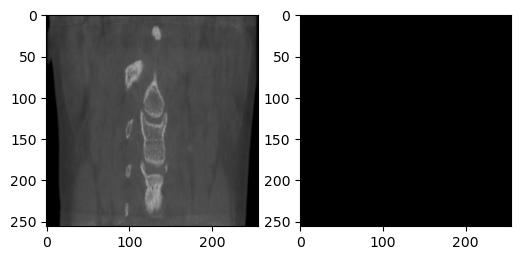

In [5]:
import matplotlib.image as mpimg 
import random
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(mask_dataset[image_number])
plt.show()

# Labels


In [6]:
mask = "#FFFFFF"
mask = mask.lstrip("#")
mask = np.array(tuple(int(mask[i:i+2], 16) for i in (0, 2, 4)))

unlabeled = "#000000"
unlabeled = unlabeled.lstrip("#")
unlabeled = np.array(tuple(int(unlabeled[i:i+2], 16) for i in (0,2,4)))

In [7]:
print(unlabeled)
print(mask)

[0 0 0]
[255 255 255]


In [8]:
mask_dataset = np.array(mask_dataset, dtype = object)
image_dataset = np.array(image_dataset, dtype = object)

In [9]:
print(mask_dataset.shape)
print(image_dataset.shape)

(5243, 256, 256, 3)
(5243, 256, 256, 3)


In [10]:
def convert_labels(label):
    label_new = np.zeros(label.shape,dtype=np.uint8)
    label_new [np.all(label == mask,axis=-1)] = 1
    label_new [np.all(label==unlabeled,axis=-1)] = 0
   
    label_new = label_new[:,:,0]
    
    return label_new    

labels = []
for i in range(0, mask_dataset.shape[0]):
    label = convert_labels(mask_dataset[i])
    labels.append(label)
    
labels = np.array(labels).astype(np.int32)
labels = np.expand_dims(labels, axis = 3)

In [11]:
no_classes = len(np.unique(labels))
print(no_classes)
# from tensorflow.keras.utils import to_categorical
# labels = to_categorical(labels, no_classes)

2


In [12]:
labels.shape

(5243, 256, 256, 1)

# Model

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(image_dataset, labels, test_size = 0.2, random_state = 0)

In [14]:
X_train = np.array(X_train).astype(np.int32)
X_test = np.array(X_test).astype(np.int32)
Y_train = np.array(Y_train).astype(np.int32)
Y_test = np.array(Y_test).astype(np.int32)

In [15]:
X_train.shape

(4194, 256, 256, 3)

In [16]:
X_test.shape

(1049, 256, 256, 3)

In [17]:
Y_train.shape

(4194, 256, 256, 1)

In [18]:
Y_test.shape

(1049, 256, 256, 1)

In [19]:
print(np.unique(labels))

[0 1]


In [20]:
from tensorflow.keras.models import Model
def unet_model (n_classes = 2, height = 256, width = 256, channels = 3):
    
    input = Input((height, width, channels))

    conv_1 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(input)
    conv_1 = Dropout(0.2)(conv_1)
    conv_1 = Conv2D(16,(3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_1)
    pool_1 = MaxPool2D((2,2))(conv_1)
                  
    conv_2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_1)
    conv_2 = Dropout(0.2)(conv_2)
    conv_2 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_2)
    pool_2 = MaxPool2D((2,2))(conv_2)
                  
    conv_3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_2)
    conv_3 = Dropout(0.2)(conv_3)
    conv_3 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_3)
    pool_3 = MaxPool2D((2,2))(conv_3)
                  
    conv_4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_3)
    conv_4 = Dropout(0.2)(conv_4)
    conv_4 = Conv2D(128, (3,3), activation = "relu", kernel_initializer= "he_normal", padding = "same")(conv_4)
    pool_4 = MaxPool2D((2,2))(conv_4)              
    
    conv_5 = Conv2D(256, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(pool_4)
    conv_5 = Dropout(0.2)(conv_5)
    conv_5 = Conv2D(256, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_5)
     
    conv_6 = Conv2DTranspose(128, (2,2), strides = (2,2), padding = "same")(conv_5)
    conv_6 = concatenate([conv_6, conv_4])
    conv_6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_6)
    conv_6 = Dropout(0.2)(conv_6)
    conv_6 = Conv2D(128, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_6)
                  
    conv_7 = Conv2DTranspose(64, (2,2), strides = (2,2), padding = "same")(conv_6)
    conv_7 = concatenate([conv_7, conv_3])
    conv_7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_7)
    conv_7 = Dropout(0.2)(conv_7)
    conv_7 = Conv2D(64, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_7)
                  
    conv_8 = Conv2DTranspose(32, (2,2), strides = (2,2), padding = "same")(conv_7)
    conv_8 = concatenate([conv_8, conv_2])
    conv_8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_8)
    conv_8 = Dropout(0.2)(conv_8)
    conv_8 = Conv2D(32, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_8)
                  
    conv_9 = Conv2DTranspose(16, (2,2), strides = (2,2), padding = "same")(conv_8)
    conv_9 = concatenate([conv_9, conv_1], axis = 3)
    conv_9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_9)
    conv_9 = Dropout(0.2)(conv_9)
    conv_9 = Conv2D(16, (3,3), activation = "relu", kernel_initializer = "he_normal", padding = "same")(conv_9)
                  
    output = Conv2D(1, (1,1), activation = "sigmoid")(conv_9)
                  
    model = Model(inputs = [input], outputs = [output])
                  
    return model

In [21]:
img_height = X_train.shape[1]
img_width = X_train.shape[2]
img_channels = X_train.shape[3]

def get_model ():
    return unet_model(n_classes= no_classes, height= img_height, width=img_width, channels=img_channels)

In [22]:
model = get_model()
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 dropout_7 (Dropout)            (None, 128, 128, 32  0           ['conv2d_14[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 128, 128, 32  9248        ['dropout_7[0][0]']              
                                )                                                                 
                                                                                                  
 conv2d_transpose_3 (Conv2DTran  (None, 256, 256, 16  2064       ['conv2d_15[0][0]']              
 spose)                         )                                                                 
                                                                                                  
 concatena

In [23]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, Y_train, 
                    batch_size = 64,
                    callbacks=[early_stop],
                    verbose=1, 
                    epochs=5, 
                    validation_data=(X_test, Y_test), 
                    shuffle=False)

Epoch 1/5
66/66 [==============================] - 972s 15s/step - loss: 2.4252 - accuracy: 0.9470 - val_loss: 0.0288 - val_accuracy: 0.9998
Epoch 2/5
66/66 [==============================] - 974s 15s/step - loss: 0.0258 - accuracy: 0.9995 - val_loss: 0.0147 - val_accuracy: 0.9998
Epoch 3/5
66/66 [==============================] - 971s 15s/step - loss: 0.0105 - accuracy: 0.9996 - val_loss: 0.0074 - val_accuracy: 0.9998
Epoch 4/5
66/66 [==============================] - 1216s 18s/step - loss: 0.0048 - accuracy: 0.9996 - val_loss: 0.0260 - val_accuracy: 0.9998
Epoch 5/5
66/66 [==============================] - 1342s 20s/step - loss: 0.0025 - accuracy: 0.9997 - val_loss: 0.0233 - val_accuracy: 0.9998


In [24]:
Y_pred = model.predict(X_test)

33/33 [==============================] - 77s 2s/step


In [31]:
Y_test = Y_test.flatten()
Y_pred = Y_pred.flatten()
Y_pred = (Y_pred > 0.5).astype(int)

Precision Score : 0.0


In [41]:

from sklearn.metrics import classification_report
report = classification_report(Y_test, Y_pred)

In [42]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00  68736609
           1       0.00      0.00      0.00     10655

    accuracy                           1.00  68747264
   macro avg       0.50      0.50      0.50  68747264
weighted avg       1.00      1.00      1.00  68747264



In [35]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
(tn, fp, fn, tp)

(68736606, 3, 10655, 0)

In [36]:
sensitivity = tp/(tp+fn)*100
specificity = tn/(tn+fp)*100
print("Sensitivity : {}".format(sensitivity))
print("Specificity : {}".format(specificity))

Sensitivity : 0.0
Specificity : 99.99999563551353


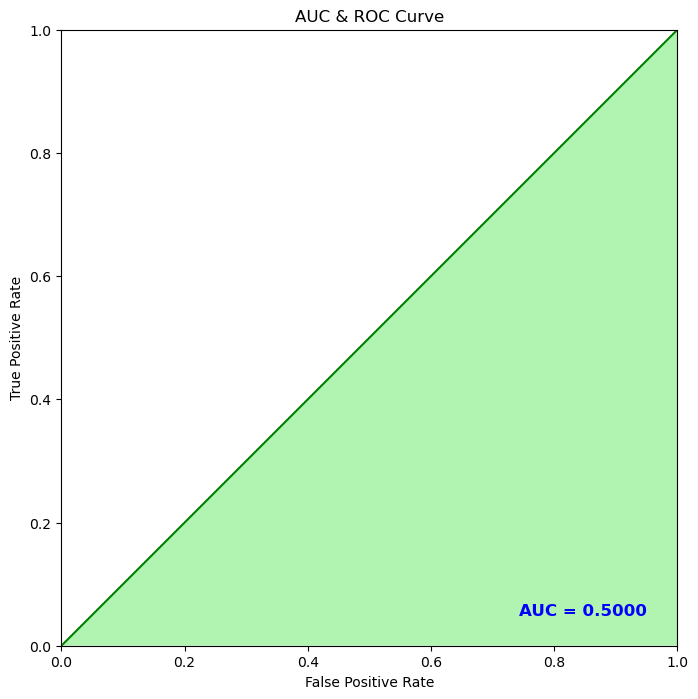

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(Y_test, Y_pred)

false_positive_rate, true_positive_rate, thresolds = roc_curve(Y_test, Y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()